<h2>Why TF-IDF?</h2>

TF-IDF is a way to create vector representation of a document by averaging all of the document's word weights.

TF-IDF tells you how important a single word is in a corpus by assigning it a weight, and down-weighting common words like "a", "and", and "the". (These are stop words anyway, which I'll be removing).

<h2>Breaking Down TF-IDF</h2>
TF-IDF number (or score) represents the importance of a term within a document relative to a collection of documents (the "corpus"). It reflects how significant a word is by considering its frequency in the document and how rare it is across the entire corpus.

1. TF (Term Frequency):
Measures how often a term appears in a document.

* Higher TF = Term appears frequently in the document.


2. IDF (Inverse Document Frequency):
Measures how rare a term is across all documents in the corpus.

* Higher IDF = Term is rare across the corpus.


3. TF-IDF Score:
The product of TF and IDF.
* High TF-IDF score means that the term is frequent in a specific document, but rare in the overall corpus. This makes the term more important.
* Low TF-IDF score means that the term is common across many documents or rarely occurs in the given document.

<h2>Advantages</h2>

* Highlights important terms like "Python", "backend", etc. instead of common ones like "the"
* Simple and computationally efficient

<h2>Limitations</h2>

* TF-IDF doesn't capture context (e.g., "engineer" and "developer" might be similar in meaning, but treated differently). By the way, do ATS platforms capture context? Or do they simply use something like TFIDF?
* It doesn't consider synonyms or semantic relationships
* More advanced techniques like word embeddings (Word2Vec, BERT) can capture semantic similarity

In [1]:
# tf-idf from scratch

In [2]:
sentence_a = "I’m the guy who’s doin his job. You must be the otha guy."
sentence_b = "He ain't gonna be in Rush Hour 3"

In [3]:
from typing import List
import re

def tokenize(text: str) -> List[str]:
    """Remove punctuation, keep alphanum, split text into list"""
    
    cleaned_text = re.sub(r"[^\w\s]", "", text)
    tokens = cleaned_text.lower().split()
    return tokens

In [4]:
doc_a = tokenize(sentence_a)
doc_b = tokenize(sentence_b)
print(doc_a)
print(doc_b)

['im', 'the', 'guy', 'whos', 'doin', 'his', 'job', 'you', 'must', 'be', 'the', 'otha', 'guy']
['he', 'aint', 'gonna', 'be', 'in', 'rush', 'hour', '3']


In [5]:
total_corpus = set(doc_a).union(set(doc_b))
print(total_corpus)

{'aint', 'rush', 'must', 'gonna', 'he', '3', 'in', 'whos', 'be', 'hour', 'doin', 'im', 'guy', 'the', 'job', 'you', 'his', 'otha'}


In [6]:
import pandas as pd

word_count_a = dict.fromkeys(total_corpus, 0)
word_count_b = dict.fromkeys(total_corpus, 0)
print(word_count_a)

{'aint': 0, 'rush': 0, 'must': 0, 'gonna': 0, 'he': 0, '3': 0, 'in': 0, 'whos': 0, 'be': 0, 'hour': 0, 'doin': 0, 'im': 0, 'guy': 0, 'the': 0, 'job': 0, 'you': 0, 'his': 0, 'otha': 0}


In [7]:
# Generate a bag of words: a frequency count of words per document
for word in doc_a:
    word_count_a[word] += 1
for word in doc_b:
    word_count_b[word] += 1

# pd.set_option("display.max_rows", None)
freq = pd.DataFrame([word_count_a, word_count_b])
freq.T

,0,1
aint,0,1
rush,0,1
must,1,0
gonna,0,1
he,0,1
3,0,1
in,0,1
whos,1,0
be,1,1
hour,0,1


In [8]:
def tf(word_counts: dict, document: List[str]) -> dict:
    """Calculate term frequency of each word in a document"""
    
    tf_dict = {}
    corpus_count = len(document)

    for word, count in word_counts.items():
        tf_dict[word] = count / float(corpus_count)

    return tf_dict

tf(word_count_a, doc_a)
    

{'aint': 0.0,
 'rush': 0.0,
 'must': 0.07692307692307693,
 'gonna': 0.0,
 'he': 0.0,
 '3': 0.0,
 'in': 0.0,
 'whos': 0.07692307692307693,
 'be': 0.07692307692307693,
 'hour': 0.0,
 'doin': 0.07692307692307693,
 'im': 0.07692307692307693,
 'guy': 0.15384615384615385,
 'the': 0.15384615384615385,
 'job': 0.07692307692307693,
 'you': 0.07692307692307693,
 'his': 0.07692307692307693,
 'otha': 0.07692307692307693}

In [9]:
import numpy as np

def idf(word_counts) -> dict:
    """Given N documents, number of documents in which the term appears for each term"""
    
    idf_dict = {}
    N = len(word_counts)

    idf_dict = dict.fromkeys(word_counts[0].keys(), 0)

    for word in idf_dict.keys():
        idf_dict[word] = sum(doc[word] > 0 for doc in word_counts)

    for word, df in idf_dict.items():
        idf_dict[word] = np.log10((N + 1.0) / (df + 1.0))

    return idf_dict

idfs = idf([word_count_a, word_count_b])
idfs

{'aint': 0.17609125905568124,
 'rush': 0.17609125905568124,
 'must': 0.17609125905568124,
 'gonna': 0.17609125905568124,
 'he': 0.17609125905568124,
 '3': 0.17609125905568124,
 'in': 0.17609125905568124,
 'whos': 0.17609125905568124,
 'be': 0.0,
 'hour': 0.17609125905568124,
 'doin': 0.17609125905568124,
 'im': 0.17609125905568124,
 'guy': 0.17609125905568124,
 'the': 0.17609125905568124,
 'job': 0.17609125905568124,
 'you': 0.17609125905568124,
 'his': 0.17609125905568124,
 'otha': 0.17609125905568124}

In [10]:
def tfidf(doc_elements, idfs) -> dict:
    """TF * IDF per word given a single word in a single document"""
    
    tfidf_dict = {}

    for word, val in doc_elements.items():
        tfidf_dict[word] = val * idfs[word]

    return tfidf_dict

In [11]:
# term freq for each document
tf_a = tf(word_count_a, doc_a)
tf_b = tf(word_count_b, doc_b)

# inverse document freq for each document
tfidf_a = tfidf(tf_a, idfs)
tfidf_b = tfidf(tf_b, idfs)

# return score
document_tfidf = pd.DataFrame([tfidf_a, tfidf_b])
document_tfidf.T

,0,1
aint,0.000000,0.022011
rush,0.000000,0.022011
must,0.013545,0.000000
gonna,0.000000,0.022011
he,0.000000,0.022011
3,0.000000,0.022011
in,0.000000,0.022011
whos,0.013545,0.000000
be,0.000000,0.000000
hour,0.000000,0.022011


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_tfidf(tfidf_matrix: pd.DataFrame):
    plt.figure(figsize=(10, 10))
    sns.heatmap(tfidf_matrix, annot=True, cmap="YlGnBu")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

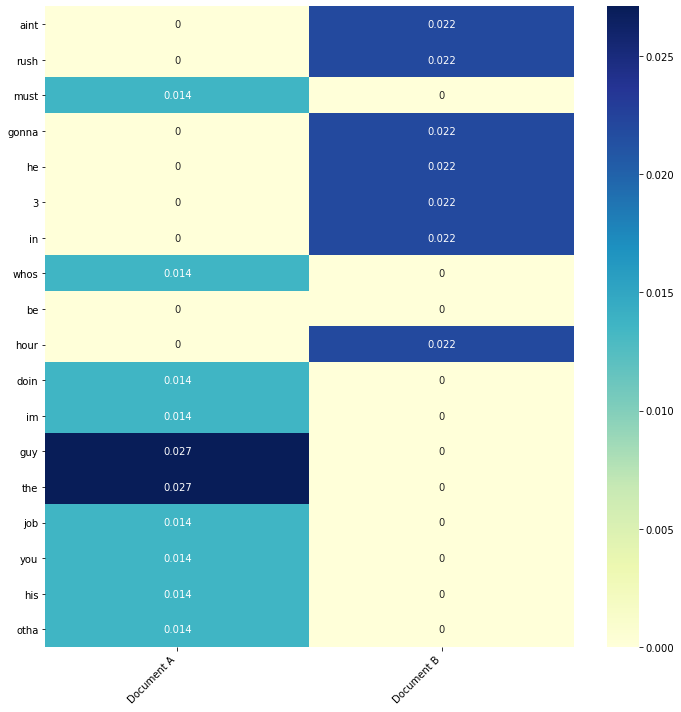

In [13]:
tfidf_matrix = pd.DataFrame([tfidf_a, tfidf_b], index=["Document A", "Document B"]).T
visualize_tfidf(tfidf_matrix)

From this heatmap, we can tell the words that are more important, and compare terms across documents.

Document similarity can be seen as well; a document with no unique terms would have all 0's.

Terms that appear less in fewer documents have higher scores, whereas terms in all documents have a score of 0.

In [14]:
resume_doc = """
Michael Keene
 (425)-377-3984 # mkeene@alumni.nd.edu ï linkedin.com/michael-james-keene § github.com/mjkeene Technical Skills
Programming Languages: Python, Java, Scala, SQL, TypeScript, JavaScript
Python Libraries: Pandas, NumPy, scikit-learn, Matplotlib, seaborn
AWS Cloud Computing: Lambda, EC2, S3, Redshift, DynamoDB (NoSQL), Glue, IAM, Lake Formation, CDK Other: Git, Bash Scripting, CI/CD, Workflow Orchestration, Jupyter Notebook, PostgreSQL, Automated Testing
Experience
Personal Sabbatical April 2023 – Present • Utilized this time for traveling, reading, spending time with family, pursuing professional development, and
exploring new hobbies and interests.
Amazon Web Services February 2021 – March 2023 Software Engineer – AWS Customer Service Seattle, WA Worked on multiple new and existing features within the backend web service that enables the customer service team to access AWS account metadata for troubleshooting. Learned the Agile workflow process, valuable testing techniques, and implementation practices for distributed systems. Utilized continuous integration/continuous deployment (CI/CD) tools.
• Architected and implemented fault-tolerant features for a distributed backend API proxy service handling over 2,500 APIs and 1 billion monthly calls, ensuring seamless access to AWS account metadata for customer service.
• Engineered a streamlined internal API onboarding process by integrating cross-functional requirements, enhancing the internal web application, and advancing automation initiatives, resulting in a 75% efficiency gain.
• Developed a scalable REST API microservice utilizing API Gateway, Lambda functions, and S3 for efficient data storage, significantly reducing deployment times and simplifying the onboarding process for internal APIs.
• Utilized Cloud Development Kit (CDK) in Python and TypeScript to orchestrate AWS infrastructure as code, ensuring consistent and scalable AWS resource provisioning.
• Successfully completed courses at Amazon’s Machine Learning University, delving into critical areas like A/B testing, data cleaning, ML workflows, and several machine learning algorithms for classification, regression, and natural language processing (NLP). Applied acquired knowledge to enhance decision-making processes.
• Actively responded to high-severity events during on-call rotations, using monitoring tools and log analysis to resolve issues quickly. Conducted proactive system maintenance to ensure ongoing stability and reliability.
Amazon May 2020 – February 2021 Software Engineering Candidate – Amazon Technical Academy Seattle, WA
• Graduated from a company-sponsored, mentored internal training program led by Amazon Software Engineers,
designed to teach software engineering skills and computer science fundamentals in a project-based environment.
• Mastered core software engineering practices such as automated testing, Git version control, object-oriented
programming, software design principles, continuous integration/continuous deployment (CI/CD), data structures
and algorithms, and AWS cloud computing.
Amazon June 2018 – May 2020 Business Analyst – Amazon Logistics Business Intelligence Seattle, WA
• Automated report generation and data visualization for business partners by processing and cleaning large-scale data from Redshift using SQL, Python, Excel, and workflow orchestration tools, ensuring data quality and query efficiency.
• Collaborated with the Data Engineering team on data modeling and creating ETL pipelines to ensure data integrity and reliability using Python, internal APIs, workflow orchestration tools, S3, Glue, and Redshift.
• Leveraged various data sources, including AWS Athena, S3, Redshift, and internal APIs for data extraction, and used Python scripting for data validation, data quality checks, data cleaning, and merging datasets.
• Developed, maintained, and automated daily analytics dashboards and self-service Tableau dashboards.
• Analyzed, validated, and aggregated extensive package-level data for the Research Science team, facilitating
machine learning model training for truck route optimization with potential savings exceeding $100M.
• Designed and launched an intermediate SQL course for our Analytics teams completed by 100+ individuals.
Education
University of Notre Dame May 2018
Bachelor of Arts in Economics, Minor in Sociology (GPA: 3.59 / 4.00) Notre Dame, IN
      • Relevant Coursework: Econometrics, Statistics and Probability, Survey Design
"""

In [15]:
job_doc = """
Who you are
We want to work with teammates based remotely in the USA, who are excited about learning how to build and support machine learning pipelines that scale not just computationally, but in ways that are flexible, iterative, and geared for collaboration
If you’d like to become a backend expert who can unify data, and build systems that scale for both operations and organization, then Fathom is your next big opportunity!
2+ years of software engineering experience in a company/production setting
Relevant experience developing backend, integrations, data pipelining, infrastructure, etc. projects in a production setting
Problem solving skills and first principles thinking
Strong computer science principles including: algorithms, databases (SQL and NoSQL), logic, etc
Hands-on backend coding and systems design using best practices in a company setting
Effective communication and exceptional collaboration skills
Desirable

Proficiency in coding with python or another modern backend language
Expertise with wrangling healthcare data and/or HIPAA
Experience with managing large-scale data labelling and acquisition
What the job involves
We are looking for a Software Engineer (Backend/Data) to work on data products that drive the core of our business
Developing data infrastructure to ingest, sanitize and normalize a broad range of medical data, such as electronics health records, journals, established medical ontologies, crowd-sourced labelling and other human inputs
Building performant and expressive interfaces to the data
Creating infrastructure to help us not only scale up data ingest, but large-scale cloud-based machine learning
"""

In [16]:
# job that does not line up with my resume at all
job_doc_2 = """
Tilray Beverages is comprised of 15+ craft brands across the United States. These beer and beverage brands possess the hallmarks of strong consumer loyalty and further diversify Tilray’s portfolio. The expected sales volume will elevate Tilray Brands to the 5th largest craft beer business position in the U.S., up from the 9th. Tilray Brands also owns Breckenridge Distillery, the award-winning spirits brand and the World’s Best Blended Whisky, and Happy Flower CBD sparkling non-alcoholic cocktails
About Tilray Brands Inc.
Tilray Brands is a leading global cannabis-lifestyle and consumer packaged goods company with operations in Canada, the United States, Europe, Australia, and Latin America that is changing people's lives for the better – one person at a time – by inspiring and empowering the worldwide community to live their very best life by providing them with products that meet the needs of their mind, body, and soul and invoke a sense of wellbeing. Tilray’s mission is to be the trusted partner for its patients and consumers by providing them with a cultivated experience and health and wellbeing through high-quality, differentiated brands and innovative products. A pioneer in cannabis research, cultivation, and distribution, Tilray’s unprecedented production platform supports over 20 brands in over 20 countries, including comprehensive cannabis offerings, hemp-based foods, and alcoholic beverages.
Looking to develop your career at the forefront of a rapidly expanding industry?
About the Role:
Tilray Beverages is seeking an organized, motivated, creative, and driven lover of the good life to execute on digital marketing initiatives to highlight and add value to our ever-growing portfolio of quality craft beverages. Our ambition is to reinvigorate the craft beer sector, becoming the fastest growing craft beer supplier in the U.S. To achieve this, we need the very best talent on our team. Feel inspired? Then this may be the opportunity for you. If you are a self-starter who knows how to work and play hard, and you have an unwavering passion for grassroots craft beer, grab your kayak and hop in the river with us! Please note this is a:
Fixed Term (6-months) contract, with the possibility of an extension
Hourly Role - starting at $24.00/hour to 26.50/hour
Job Summary:
Coordinates and manages all aspects of content development and deployment across existing and emerging digital channels. Will be responsible for content ideation and execution, receiving and executing creative content briefs from other areas of the business, managing external photographers and videographers as needed. This person will have a solid understanding of how each digital and social media channel works and how to optimize content so that it is always engaging.
Responsibilities:
Day-to-day management of all existing social media channels, including but not limited to:
Content ideation
Creating various types of compelling content
Content calendaring several weeks/months ahead
Posting social content
Community management in partnership with external agency and brand teams
On-going community management and moderation based on strategy provided by social agency, Integrated Customer Experience and brand teams
Identifying, on-boarding and retention of a roster of external content creators as needed
Staying on the pulse of social/content trends to ensure continued brand relevance and awareness
Posting content across social media accounts
Leverage insights and analytics provided by external social agency to influence future content ideation
Skills/Qualifications:
2-3 years previous experience in a content creation; with a beverage brand preferred but not required
Previous experience with a social media posting, monitoring and reporting platform (i.e.—Hootsuite, Sprinklr, Sprout, etc.)
Proficiency in Photoshop, Illustrator, Canva or similar photo editing software, as well as video editing software such as Lightroom or Premier
Ability to manage freelance photographers and videographers as well as be able to be behind the camera to capture product specific, behind the scenes and lifestyle content
Ability to straddle both the creative development and engaging a social community
Ability to work on-site in order to procure necessary product and facilitate capture of content
Passion for craft beer
We have a friendly, supportive team with a coaching and mentoring environment. There are real opportunities for future development and progression – this really could be a move towards the exciting career you’ve always wanted!

Tilray Brands Inc. is an equal opportunity employer, committed to promoting diversity and inclusion in our workplace. As a Brand Activation Manager at Tilray Beer Division, you will have the opportunity to lead and grow a dynamic team, innovate and experiment with new ingredients and styles, and contribute to the success of one of the top craft breweries in the nation.
Accommodations are available for applicants with disabilities throughout the recruitment process. If you require accommodations for interviews or other meetings, please advise when submitting your application.

Please note that Tilray does not authorize, engage, or sponsor any consultants, agencies or organizations that seek certain personal or financial information from you (e.g. passwords, login ids, credit card information). High Park does not charge any application, processing or onboarding fee at any stage of the recruitment or hiring process.

When replying to emails, please ensure the sender name and email address match exactly. Please also ensure the Reply-To address matches the sending address exactly.
If you are concerned about the authenticity of an email, letter, or call purportedly from, for, or on behalf of High Park, please send an email inquiry to infosec@tilray.com
#TilrayS
"""

In [17]:
# Using builtin library
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TfidfVectorizer with no custom stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on a sample corpus (can't be empty)
vectorizer.fit(["aloha"])

standard_stop_words = vectorizer.get_stop_words()

# Custom stop words to add
custom_stop_words = ["looking", "seeking", "job", "position", "role", "skilled", "team", "join", "apply", "experience"]

# Combine standard and custom stop words
expanded_stop_words = standard_stop_words.union(custom_stop_words)

corpus = [resume_doc, job_doc]

titles = ["resume", "job_posting"]

vectorizer = TfidfVectorizer(stop_words=expanded_stop_words, ngram_range=(1, 3))
vector = vectorizer.fit_transform(corpus)
dict(zip(vectorizer.get_feature_names(), vector.toarray()[0]))

tfidf_df = pd.DataFrame(
    vector.toarray(), index=titles, columns=vectorizer.get_feature_names()
)

# resume_tfidf = vector[0]
# job_posting_tfidf = vector[1]

# Might need a different similarity measure, number is always quite low here
# cosine_sim = cosine_similarity(resume_tfidf, job_posting_tfidf)
# print(cosine_sim)


In [18]:
tfidf_df.head()

,00,00 notre,00 notre dame,100,100 individuals,100 individuals education,100m,100m designed,100m designed launched,2018,...,workflow process valuable,workflows,workflows machine,workflows machine learning,wrangling,wrangling healthcare,wrangling healthcare data,years,years software,years software engineering
resume,0.022053,0.022053,0.022053,0.022053,0.022053,0.022053,0.022053,0.022053,0.022053,0.044106,...,0.022053,0.022053,0.022053,0.022053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
job_posting,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.044088,0.044088,0.044088,0.044088,0.044088,0.044088


In [19]:
# Sort terms by importance in the job_posting
important_job_terms = tfidf_df.loc["job_posting"].sort_values(ascending=False)
important_job_terms

data                           0.313688
scale                          0.156844
backend                        0.156844
setting                        0.132263
learning                       0.094107
                                 ...   
exceeding 100m designed        0.000000
exceeding 100m                 0.000000
exceeding                      0.000000
events rotations using         0.000000
javascript python libraries    0.000000
Name: job_posting, Length: 1582, dtype: float64

In [20]:
# Identify missing terms: Terms that have a non-zero score in 'job_posting' but are 0 in 'resume'
missing_terms = important_job_terms[tfidf_df.loc["resume"] == 0]
missing_terms.head(20)

setting                           0.132263
ingest                            0.088176
developing                        0.088176
labelling                         0.088176
production                        0.088176
production setting                0.088176
work                              0.088176
build                             0.088176
collaboration                     0.088176
coding                            0.088176
medical                           0.088176
databases sql                     0.044088
developing data infrastructure    0.044088
effective                         0.044088
relevant developing               0.044088
relevant developing backend       0.044088
data work                         0.044088
remotely                          0.044088
remotely usa                      0.044088
remotely usa excited              0.044088
Name: job_posting, dtype: float64

<h3>Important Updates</h3>
Some things that need to be handled to ensure the output is actually useful:

1. Remove stopwords, these don't add value (can easily do this with TfidfVectorizer from sklearn). Add custom stop-words to remove common but irrelevant job posting words.
2. Word-stemming/Lemmatization? Not going to do this since it will change the inputs, I want exact matching, though ATS systems likely use broad matching in most cases. Maybe a future update.
3. <b>Can use n-grams (2 or 3 grams) to capture meaningful sequences of words, rather than just individual words. Do this on top of the 1-gram default. There are so many multi-word, important terms like "python developer", "software engineer", "machine learning", etc. Bigrams and Trigrams will capture more meaningful matches.</b>
4. Upgrade to Word2Vec, BERT, or GloVe to capture semantic similarity later on (if that's how ATS systems process resumes; if they use more basic comparisons like tf-idf, then I should stick with this).
5. Not really a consideration here, but TF-IDF is skewed by document length. Longer documents may have more common terms, which might result in a lower weight for the truly important keywords. Normalizing tf-idf scores or considering other weighting schemes like BM25 can handle this.
7. Update evaluation of matching based on precision/recall -- I want correct matches, rather than catching every single match.
8. Can add some kind of intelligent filtering to only show most relevant terms. For now I'll show the top X terms, but it would be better to have a way to dynamically change this (i.e., if only 3 terms missing are relevant, and then the others are low score adjectives/verbs, it's probably best to only show those top 3).
9. Add cosine similarity here to get overall similarity score